In [5]:
import numpy as np 
import pandas as pd 
import torch
import torchvision
import json
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import torch,sklearn


In [6]:
!pip install ktrain


In [7]:
!pip install  simpletransformers

In [8]:
!pip install lime

In [9]:
!pip install  transformers

In [21]:
! pip install  fastText 

In [23]:
import ktrain
from simpletransformers.classification import ClassificationModel
from lime import lime_text
import transformers
from sklearn.model_selection import train_test_split
import fasttext 

In [11]:
df = pd.read_excel('news.xls')

In [12]:
print(df.head())

                                             content  ...                                           headline
0  Dışişleri Bakanı Davutoğlu, Yunanistan ile Tür...  ...                           'Ortak vizyonumuz var'\r
1  İsrail Gazze Şeridi'nin kuzeyindeki bir tarlay...  ...        İsrail'den Gazze Şeridi'ne hava saldırısı\r
2  Lübnan'ın başkenti Beyrut'ta düzenlenen bombal...  ...      Cenaze için geniş güvenlik önlemleri alındı\r
3  KKTC'de Sendikal Platform genel grev başlattı....  ...                Gözaltındaki sendikacılar serbest\r
4  Türkiye'den yola çıkan Başak Bulut, Seçil Öznu...  ...  Bisikletle Asya'da 3 bin kilometre yol katetti...

[5 rows x 3 columns]


In [13]:
df.category

0        dünya
1        dünya
2        dünya
3        dünya
4        dünya
         ...  
41986    yaşam
41987    yaşam
41988    yaşam
41989    yaşam
41990    yaşam
Name: category, Length: 41991, dtype: object

In [14]:
df.shape


(41991, 3)

In [36]:
data=df.rename(columns = {'content': 'text', 'category': 'label'})
data = data.sample(frac = 1)

In [37]:
print(data.head())

                                                    text    label
5313   Türkiye İstatistik Kurumu (TÜİK) Manisa Bölge ...  ekonomi
20706  'Öyle Bir Geçer Zaman ki'nin 'Carolin'i Wilma ...  magazin
16505  Samsun'un Çarşamba ilçesinde bir eve hırsızlık...   güncel
35156  Galatasaray Kulübü, Hollandalı futbolcu Wesley...     spor
24712  İtalya eski Başbakanı Silvio Berlusconi 27 yaş...   planet


In [38]:
train, test = train_test_split(data, test_size=0.1, random_state=42)

In [39]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train.head()
test.head()

,text,label
0,Hattat Tarım Makineleri Sanayi ve Ticaret AŞ G...,ekonomi
1,Chicago Tribune ve Los Angeles Times gazeteler...,ekonomi
2,Londra Brent tipi ham petrolün varil fiyatı bu...,ekonomi
3,PTT 1. Ligde 10. hafta tek maç dışında tamamla...,spor
4,İstanbul Atatürk Havalimanı'ndan Hasköy'deki R...,güncel


In [41]:
train["label_format"]=0
for i in range(len(train)):
    train.label_format[i]="__label__"+str(train.label[i])+" "+str(train.text[i])
#Data prepare for fasttext format for test
test["label_format"]=0
for i in range(len(test)):
    test.label_format[i]="__label__"+str(test.label[i])+" "+str(test.text[i])

train.label_format.to_csv('fasttext_train.txt',index=None,header=None)
test.label_format.to_csv('fasttext_test.txt',index=None,header=None)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [42]:
#train classifier model
model = fasttext.train_supervised('fasttext_train.txt',epoch=50,lr=0.05,label='__label__',dim=300)
#test fasttext model
model.test('fasttext_test.txt')
result = model.test('fasttext_train.txt')
validation = model.test('fasttext_test.txt')



In [43]:

# accuracy scor
text_line =  "accuracy:" + str(result[1])  + ",validation:" + str(validation[1]) + '\n' 
print(text_line)

accuracy:0.8052003775851712,validation:0.47789634146341464



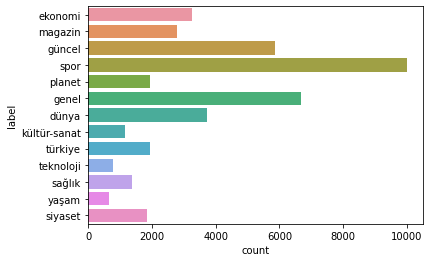

In [53]:
import seaborn as sns
sns.countplot(data=data,  y ='label')

plt.show()
